In [86]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Care este numarul necesar de sample-uri, N, pentru a calcula DFT a unui semnal x(n), a carui frecventa de esantionare este fs = 44.1kHz, astfel incat distantarea binurilor DFT sa fie de 1Hz?

distanta dintre binuri = fs/N => 1 Hz = 44100 Hz / N => N = 44100

### 2. a) Scrieti cate o functie prin care sa construiti o fereastra dreptunghiulara si o fereastra de tip Hanning. Functiile primesc ca parametru dimensiunea ferestrei. Afisati grafic o sinusoida cu frecventa f = 100, amplitudine unitara si faza nula trecuta prin cele doua tipuri de ferestre de dimensiune Nw = 200.

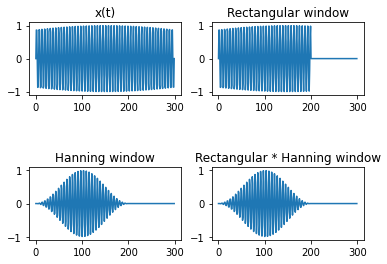

In [144]:
def wrapper(function, windowSize):
    return lambda x: [function(i) if i < windowSize else 0 for i in range(len(x))]

def rectangular(windowSize):
    return wrapper(lambda x: 1, windowSize)

def hanning(windowSize):
    return wrapper(lambda x: 0.5 * (1 - np.cos(2 * np.pi * x / windowSize)), windowSize)

def x(t):
    return np.sin(200*np.pi*t)

time = np.linspace(0, 0.5, 300)

fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=1)
ax[0, 0].plot(x(time))
ax[0, 0].set_title('x(t)')
ax[0, 1].plot(x(time) * rectangular(200)(time))
ax[0, 1].set_title('Rectangular window')
ax[1, 0].plot(x(time) * hanning(200)(time))
ax[1, 0].set_title('Hanning window')
ax[1, 1].plot(x(time) * rectangular(200)(time) * hanning(200)(time))
ax[1, 1].set_title('Rectangular * Hanning window')

plt.show()

### b) Afisati grafic spectrele a doua sinusoide, prima cu frecventa f1 = 1000Hz, a doua cu frecventa f2 = 1100Hz, ambele esantionate cu fs = 8000Hz si pe care ati aplicat o fereastra dreptunghiulara (utilizand functia creata mai sus) de 1000 de esantioane. Comentati diferentele. Pe care din cele doua sinusoide ati aplica fereastra in practica?

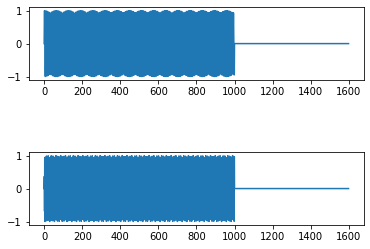

In [138]:
def f1(t):
    return np.sin(2000*np.pi*t)

def f2(t):
    return np.sin(2200*np.pi*t)

time = np.linspace(0, 5, 1600)
window = rectangular(1000)

fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1)
ax[0].plot(f1(time) * window(time))
ax[1].plot(f2(time) * window(time))

### c) (Bonus) Implementati functii si pentru restul tipurilor de ferestre din Tabelul 1 si afisati-le grafic.

Text(0.5, 1.0, 'Flat top window')

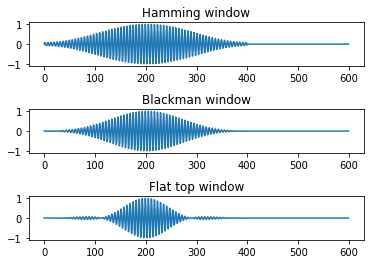

In [152]:
def hamming(windowSize):
    return wrapper(lambda x: 0.54 - 0.46 * np.cos(2 * np.pi * x / windowSize), windowSize)

def blackman(windowSize):
    return wrapper(lambda x: (0.42 - 0.5 * np.cos(2 * np.pi * x / windowSize) + 0.08 * np.cos(4 * np.pi * x / windowSize)), windowSize)

def flat_top(windowSize):
    return wrapper(lambda x: (0.22 - 0.42 * np.cos(2 * np.pi * x / windowSize) + 0.28 * np.cos(4 * np.pi * x / windowSize) - 0.08 * np.cos(6 * np.pi * x / windowSize)) + 0.007 * np.cos(8 * np.pi * x / windowSize), windowSize)

time = np.linspace(0, 1, 600)

fig, ax = plt.subplots(3, 1)
fig.subplots_adjust(hspace=1)
ax[0].plot(x(time) * hamming(400)(time))
ax[0].set_title('Hamming window')
ax[1].plot(x(time) * blackman(400)(time))
ax[1].set_title('Blackman window')
ax[2].plot(x(time) * flat_top(400)(time))
ax[2].set_title('Flat top window')

### 3. Fisierul trafic.csv contine date de trafic inregistrate pe o perioada de 1 saptamana. Frecventa de esantionare este de 1 ora, iar valorile masurate reprezinta numarul de vehicule ce trec printr-o anumita locatie.
### (a) Selectati din semnalul dat o portiune corespunzatoare pentru 3 zile, pe care veti lucra in continuare.

In [169]:
import csv

data = []
with open("trafic.csv", newline='') as f:
    reader = csv.reader(f)
    for x in reader:
        if x[0].isnumeric():
            data.append(int(x[0]))
    
    
three_days = data[:len(data) // 7 * 3]
print(len(three_days))

213


### b) Utilizati functia np.convolve(x, np.ones(w), ’valid’) / w pentru a realiza un filtru de tip medie alunecatoare si neteziti semnalul obtinut anterior. Setati dimensiuni diferite ale ferestrei, spre exemplu 5,9,13,17.


Text(0.5, 1.0, 'Hamming window')

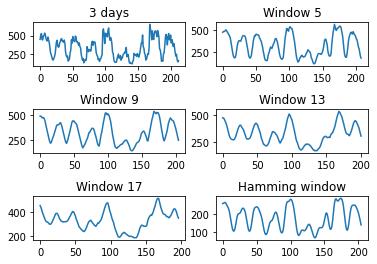

In [177]:
conv_5 = np.convolve(three_days, np.ones(5), 'valid') / 5
conv_9 = np.convolve(three_days, np.ones(9), 'valid') / 9
conv_13 = np.convolve(three_days, np.ones(13), 'valid') / 13
conv_17 = np.convolve(three_days, np.ones(17), 'valid') / 17
conv_hamming = np.convolve(three_days, hamming(9)(range(9)), 'valid') / 9

fig, ax = plt.subplots(3, 2)
fig.subplots_adjust(hspace=1)
ax[0, 0].plot(three_days)
ax[0, 0].set_title('3 days')
ax[0, 1].plot(conv_5)
ax[0, 1].set_title('Window 5')
ax[1, 0].plot(conv_9)
ax[1, 0].set_title('Window 9')
ax[1, 1].plot(conv_13)
ax[1, 1].set_title('Window 13')
ax[2, 0].plot(conv_17)
ax[2, 0].set_title('Window 17')
ax[2, 1].plot(conv_hamming)
ax[2, 1].set_title('Hamming window 9')
